
# A simple Darcy-Flow dataset
In this example, we demonstrate how to use the small Darcy-Flow example we ship with the package


## Import the library
We first import our `neuralop` library and required dependencies.



In [2]:
import matplotlib.pyplot as plt
from neuralop.datasets import load_darcy_flow_small

## Load the dataset
Training samples are 16x16 and we load testing samples at both 
16x16 and 32x32 (to test resolution invariance).



In [10]:
train_loader, test_loaders, data_processor = load_darcy_flow_small(
        n_train=100, batch_size=4, 
        test_resolutions=[16, 32], n_tests=[50, 50], test_batch_sizes=[4, 2],
        )

train_dataset = train_loader.dataset
print(f'Training samples have shape {train_dataset[0]["x"].shape[1:]}')

Loading test db at resolution 32 with 50 samples and batch-size=2
Training samples have shape torch.Size([16, 16])


## Visualizing the data



16
Testing samples for res 16 have shape torch.Size([1, 16, 16])
32
Testing samples for res 32 have shape torch.Size([1, 32, 32])
Training sample have shape torch.Size([16, 16])


C:\Users\zhang\AppData\Local\Temp\ipykernel_76084\851488914.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


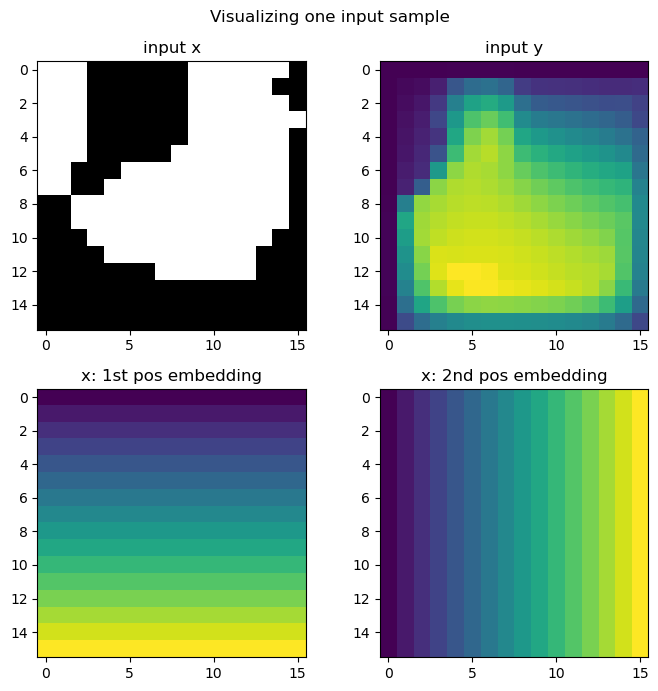

In [12]:
for res, test_loader in test_loaders.items():
    print(res)
    # Get first batch
    batch = next(iter(test_loader))
    x = batch['x']
    y = batch['y']

    print(f'Testing samples for res {res} have shape {x.shape[1:]}')


data = train_dataset[0]
x = data['x']
y = data['y']

print(f'Training sample have shape {x.shape[1:]}')


# Which sample to view
index = 0

data = train_dataset[index]
data = data_processor.preprocess(data, batched=False)
x = data['x']
y = data['y']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(x[0], cmap='gray')
ax.set_title('input x')
ax = fig.add_subplot(2, 2, 2)
ax.imshow(y.squeeze())
ax.set_title('input y')
ax = fig.add_subplot(2, 2, 3)
ax.imshow(x[1])
ax.set_title('x: 1st pos embedding')
ax = fig.add_subplot(2, 2, 4)
ax.imshow(x[2])
ax.set_title('x: 2nd pos embedding')
fig.suptitle('Visualizing one input sample', y=0.98)
plt.tight_layout()
fig.show()